# Iris Flower Classification

## 1. Importing Required Libraries

In [101]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 2. Data Processing

In [102]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [105]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###### No null values are present in the dataset, so no need of cleaning.

### Representing species labels as numbers

In [106]:
lenc = preprocessing.LabelEncoder()
data['species'] = lenc.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 3. Exploratory Data Analysis

In [107]:
data['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [108]:
sb.set()

<Axes: xlabel='sepal_length', ylabel='Count'>

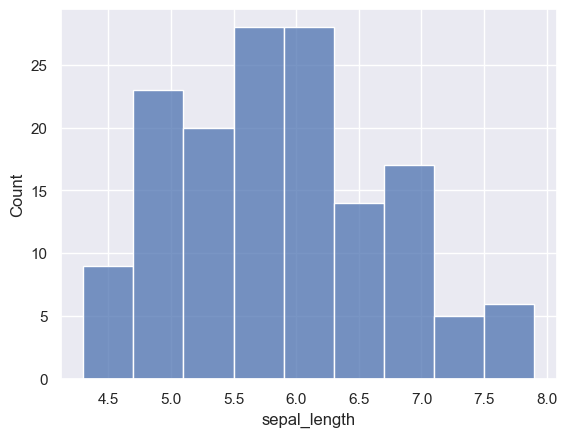

In [109]:
sb.histplot(x = 'sepal_length', data = data)

<Axes: xlabel='sepal_width', ylabel='Count'>

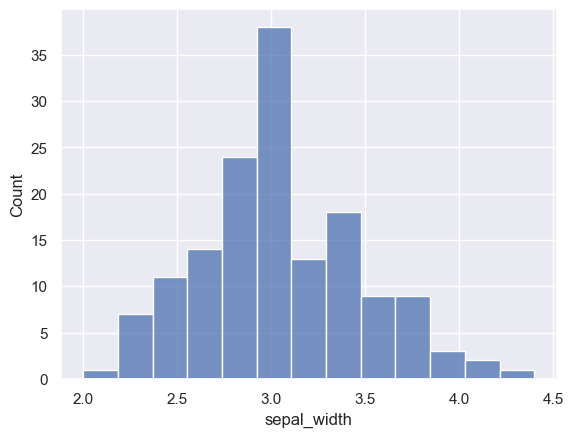

In [110]:
sb.histplot(x = 'sepal_width', data = data)

<Axes: xlabel='petal_length', ylabel='Count'>

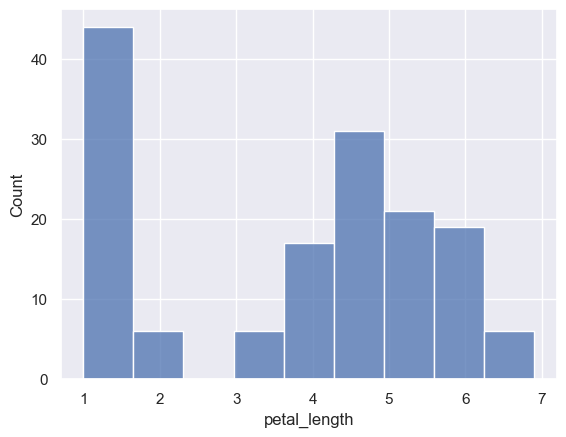

In [111]:
sb.histplot(x = 'petal_length', data = data)

<Axes: xlabel='petal_width', ylabel='Count'>

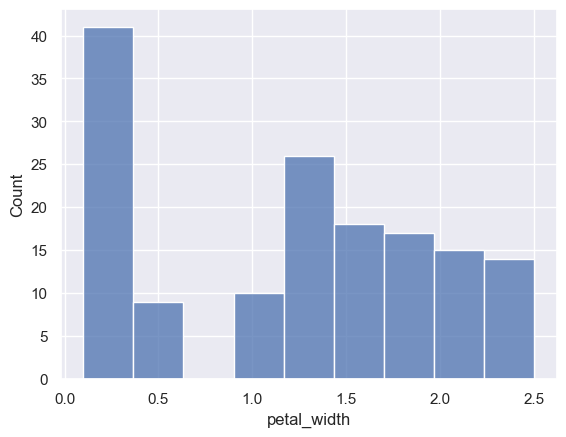

In [112]:
sb.histplot(x = 'petal_width', data = data)

<Axes: xlabel='petal_length', ylabel='sepal_length'>

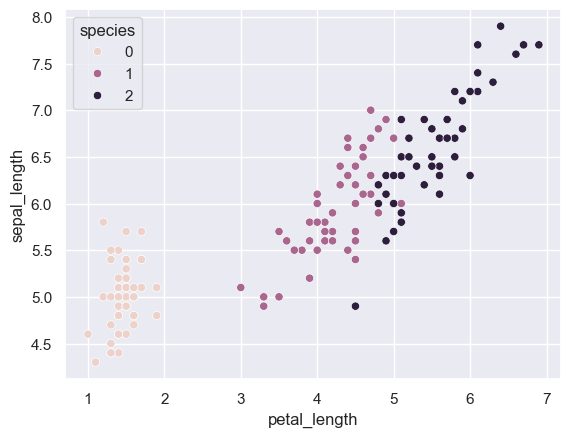

In [113]:
sb.scatterplot(x = 'petal_length', y = 'sepal_length', hue = 'species', data = data)

<Axes: xlabel='petal_width', ylabel='sepal_width'>

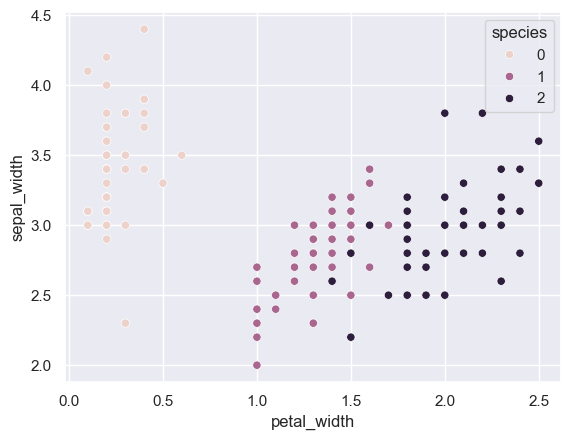

In [114]:
sb.scatterplot(x = 'petal_width', y = 'sepal_width', hue = 'species', data = data)

<Axes: >

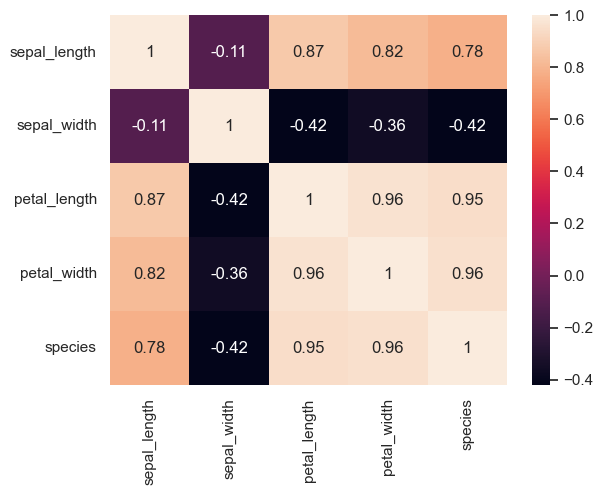

In [115]:
sb.heatmap(data = data.corr(), annot = True)

## 4. Splitting Dataset into Training and Testing Dataset

In [116]:
X = data.drop(columns = ['species'], axis = 1)
y = data['species']

In [117]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [118]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [119]:
# Considering 2/3rd data for training and remaining for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3)

In [120]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(150, 4) (100, 4) (50, 4)
(150,) (100,) (50,)


## 5. Model Training

In [121]:
#Using Logistic Regression
log_model = LogisticRegression()

In [122]:
log_model.fit(X_train, y_train)

d:\Tools\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 6. Prediction and Model Accuracy

In [123]:
X_train_predict = log_model.predict(X_train)
print(X_train_predict)

[0 0 2 1 1 0 2 0 2 1 0 0 2 2 0 0 1 2 2 0 2 1 0 0 2 2 2 1 1 1 0 0 2 2 1 2 1
 2 0 2 0 1 1 2 2 0 1 0 1 1 1 0 2 0 2 1 2 1 2 1 0 2 1 2 1 0 1 2 0 1 0 0 0 1
 2 0 0 2 0 1 2 1 2 2 1 1 2 1 0 1 1 0 1 2 2 2 0 0 2 1]


In [124]:
train_accuracy = accuracy_score(y_train, X_train_predict)
print(train_accuracy)

0.98


In [125]:
test_predict = log_model.predict(X_test)
print(test_predict)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2 1 0 2 2 1]


In [126]:
test_accuracy = accuracy_score(y_test, test_predict)
print(test_accuracy)

0.96


##### Accuracy of our model is 96%.